🎯 Desafio dia 95 — Série Temporal de Temperatura Diária

📂 Dataset: desafio_dia_95_temperatura.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Um instituto meteorológico está analisando a temperatura diária ao longo de um ano para entender padrões de variação e criar previsões simples.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

    Converta a coluna data para o tipo datetime (se necessário).

    Crie novas colunas: mês, semana, dia_do_ano com base na data.

📊 Análise geral

    Qual foi o mês com maior média de temperatura máxima?

    Qual foi a menor temperatura mínima registrada em um domingo?

📈 Visualização de dados

    Crie um gráfico de linha com a temperatura máxima ao longo do ano.

    Sobreponha no mesmo gráfico uma média móvel de 7 dias (rolling mean).

🤖 Machine Learning - Previsão leve

    Crie uma coluna temp_max_amanha, com a temperatura máxima do dia seguinte (shift(-1)).

    Modele a previsão de temp_max_amanha com base em:

        temperatura_max, temperatura_min

    Use:

        LinearRegression, train_test_split

        Avalie com mean_squared_error

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_95_temperatura.csv")
df.head()

,data,temperatura_max,temperatura_min
0,2023-01-01,26.8,18.1
1,2023-01-02,27.1,19.8
2,2023-01-03,29.0,16.8
3,2023-01-04,29.7,22.1
4,2023-01-05,30.8,14.9


In [11]:
#Converta a coluna data para o tipo datetime (se necessário).
df["data"] = pd.to_datetime(df["data"])

#Crie novas colunas: mês, semana, dia_do_ano com base na data.
df["mes"] = df["data"].dt.month
df["semana"] = df["data"].dt.isocalendar().week
df["dia_do_ano"] = df["data"].dt.dayofyear
df["dia_semana"] = df["data"].dt.day_name()

In [8]:
#Qual foi o mês com maior média de temperatura máxima?
mes_temperatura = df.groupby("mes")["temperatura_max"].mean().sort_values(ascending=False)
print(mes_temperatura)

mes
4     35.043333
3     34.838710
5     33.464516
2     32.567857
1     29.896774
6     29.843333
12    26.574194
7     25.838710
11    23.560000
8     22.929032
9     21.430000
10    20.658065
Name: temperatura_max, dtype: float64


In [15]:
#Qual foi a menor temperatura mínima registrada em um domingo?
domingo = df[df["dia_semana"] == "Sunday"]
temp_min_domingo = domingo.groupby("dia_semana")["temperatura_min"].min()
print(temp_min_domingo)

dia_semana
Sunday    9.6
Name: temperatura_min, dtype: float64


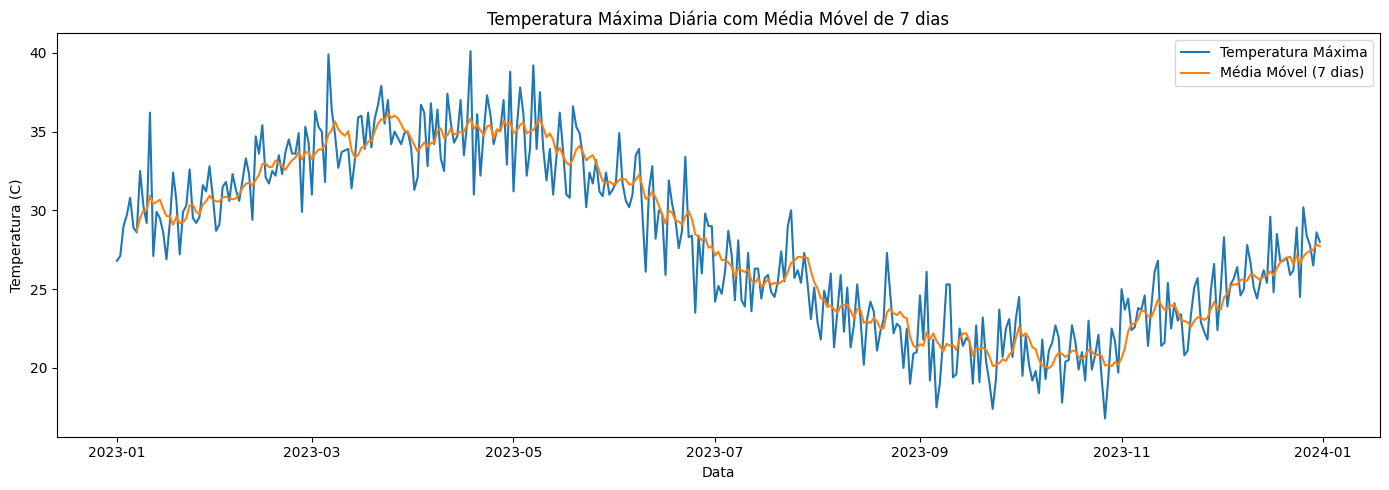

In [23]:
#Crie um gráfico de linha com a temperatura máxima ao longo do ano.
plt.figure(figsize=(14, 5))
plt.plot(df["data"], df["temperatura_max"], label="Temperatura Máxima")
plt.plot(df["data"], df["temperatura_max"].rolling(7).mean(), label="Média Móvel (7 dias)")
plt.xlabel("Data")
plt.ylabel("Temperatura (C)")
plt.title("Temperatura Máxima Diária com Média Móvel de 7 dias")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
#Crie uma coluna temp_max_amanha, com a temperatura máxima do dia seguinte (shift(-1)).
df["temp_max_amanha"] = df["temperatura_max"].shift(-1)
df.dropna(inplace=True)

#Modele a previsão de temp_max_amanha com base em:
X = df[["temperatura_max", "temperatura_min"]]
y = df["temp_max_amanha"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

6.147279406326225
